In [15]:
import tensorflow as tf
from tensorflow.keras import layers, losses, metrics, optimizers
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
df = pd.read_csv('Data_removed_outlier_iqr.csv')

In [3]:
df.head(10)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,35280,717.703,264.995250,170.035245,1.558472,0.766994,35772,211.943132,0.703616,0.986246,0.860694,0.799800,0.007511,0.001896,0.639680,0.996923,DERMASON
1,83296,1142.638,446.765889,239.013317,1.869209,0.844861,84270,325.662035,0.702588,0.988442,0.801709,0.728932,0.005364,0.000934,0.531342,0.993190,CALI
2,35594,689.634,254.572928,178.441837,1.426644,0.713214,35966,212.884213,0.811629,0.989657,0.940479,0.836241,0.007152,0.002157,0.699298,0.997650,DERMASON
3,52710,872.700,326.039383,207.399450,1.572036,0.771592,53280,259.060720,0.677419,0.989302,0.869707,0.794569,0.006186,0.001521,0.631340,0.992488,SIRA
4,62855,1004.759,413.879306,194.299306,2.130112,0.882954,63781,282.894807,0.598340,0.985482,0.782395,0.683520,0.006585,0.000887,0.467200,0.995188,HOROZ
5,36112,723.077,225.328776,204.666339,1.100957,0.418317,36709,214.427672,0.792243,0.983737,0.867945,0.951621,0.006240,0.003156,0.905583,0.997008,SEKER
6,59442,975.979,402.887444,190.149460,2.118794,0.881616,60289,275.107079,0.732468,0.985951,0.784192,0.682839,0.006778,0.000909,0.466268,0.987927,HOROZ
7,58931,957.164,388.354344,194.043039,2.001383,0.866225,59526,273.922032,0.822714,0.990004,0.808316,0.705340,0.006590,0.001006,0.497505,0.995698,HOROZ
8,34010,681.989,257.829640,168.646392,1.528818,0.756408,34410,208.093433,0.713147,0.988375,0.918886,0.807097,0.007581,0.001984,0.651405,0.995880,DERMASON
9,27280,603.203,223.021086,156.155434,1.428199,0.713964,27550,186.370531,0.760418,0.990200,0.942166,0.835663,0.008175,0.002459,0.698333,0.997359,DERMASON


In [4]:
net = tf.keras.Sequential(
    [
        layers.Dense(512, activation='relu'),
        layers.Dense(256, activation='relu'),
        layers.Dense(7)
    ]
)

In [5]:
X = df.drop(columns=["Class"]).values
y = df.Class.astype("category").cat.codes.values

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.25
)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.25
)

In [7]:
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(32)
val_ds = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(16)

In [8]:
net.compile(
    optimizer=optimizers.Adam(learning_rate=3e-4),
    loss=losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[metrics.SparseCategoricalAccuracy()]
)

In [9]:
history = net.fit(train_ds, validation_data=val_ds, epochs=20)

Epoch 1/20
231/231 [==============================] - 2s 5ms/step - loss: 0.4808 - sparse_categorical_accuracy: 0.8599 - val_loss: 0.2647 - val_sparse_categorical_accuracy: 0.9069
Epoch 2/20
231/231 [==============================] - 1s 5ms/step - loss: 0.2348 - sparse_categorical_accuracy: 0.9142 - val_loss: 0.2327 - val_sparse_categorical_accuracy: 0.9134
Epoch 3/20
231/231 [==============================] - 1s 4ms/step - loss: 0.2132 - sparse_categorical_accuracy: 0.9205 - val_loss: 0.2224 - val_sparse_categorical_accuracy: 0.9154
Epoch 4/20
231/231 [==============================] - 1s 4ms/step - loss: 0.2046 - sparse_categorical_accuracy: 0.9226 - val_loss: 0.2167 - val_sparse_categorical_accuracy: 0.9203
Epoch 5/20
231/231 [==============================] - 1s 4ms/step - loss: 0.1996 - sparse_categorical_accuracy: 0.9241 - val_loss: 0.2134 - val_sparse_categorical_accuracy: 0.9223
Epoch 6/20
231/231 [==============================] - 1s 4ms/step - loss: 0.1958 - sparse_categorica

In [10]:
test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(16)

In [11]:
net.evaluate(test_ds)

205/205 [==============================] - 1s 3ms/step - loss: 0.2137 - sparse_categorical_accuracy: 0.9231


[0.21366901695728302, 0.923123836517334]

In [12]:
preds = net(X_test)
preds = tf.argmax(preds, axis=1)

In [13]:
preds

<tf.Tensor: shape=(3278,), dtype=int64, numpy=array([6, 2, 6, ..., 2, 5, 3], dtype=int64)>

In [17]:
cf = confusion_matrix(y_test, preds)

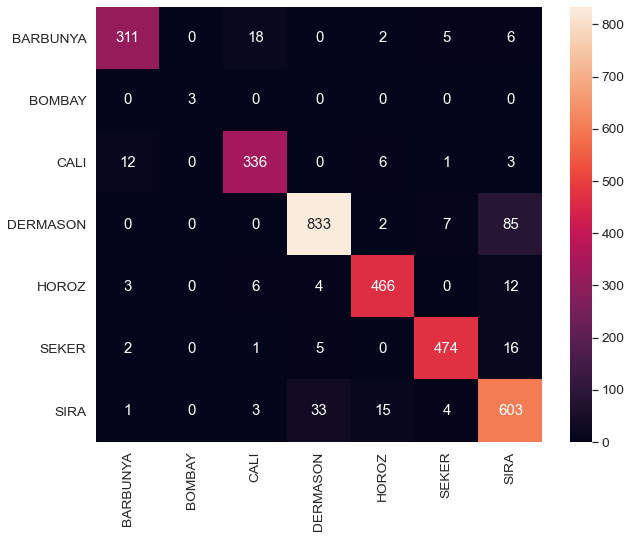

In [18]:
classes = df.Class.astype("category").cat.categories.tolist()
sns.set(rc={"figure.figsize": (10, 8)}, font_scale=1.25)
_ = sns.heatmap(cf, annot=True, xticklabels=classes, yticklabels=classes, fmt="d")